# Linear algebra
**Note:** Throughout the text we assume being in finite dimensional spaces over $\mathbb{R}$ equipped with the Euclidian inner product.

In [249]:
def plot_2D_vector(vector, with_coordinate_projections=True, color='black', lw=1):
    x, y = vector
    
    arrow = plt.arrow(
        0, 0, 
        *vector, 
        head_width=0.05, 
        head_length=0.1, 
        color=color, 
        length_includes_head=True,
        lw=lw)
        
    plt.ylim((
        min(0, min(1.2 * min(vector), plt.ylim()[0])), 
        max(1.2 * max(vector), plt.ylim()[1])
    ))
    plt.xlim((
        min(0, min(1.2 * min(vector), plt.xlim()[0])), 
        max(1.2 * max(vector), plt.xlim()[1])
    ))
    
    if with_coordinate_projections:
        plt.hlines(y, 0, x, linestyles='--', alpha=0.2, color=color)
        plt.vlines(x, 0, y, linestyles='--', alpha=0.2, color=color)
    
    if min(plt.xlim()[0], plt.ylim()[0]) < 0:
        plt.axhline(0, color='black', alpha=0.1)
        plt.axvline(0, color='black', alpha=0.1)
    
    return arrow

In [236]:
import numpy as np
import matplotlib.pyplot as plt

## Vectors
Vectors are arrows which encode magnitute and direction of some entity. Their visualization can be very informative, but they are inpractical when it comes to computations. The main tool to work with vectors is their Cartesian coordinate representation.

In terms of programming, they can be represented by arrays of their coordinates, e.g. tuples, lists or numpy arrays.

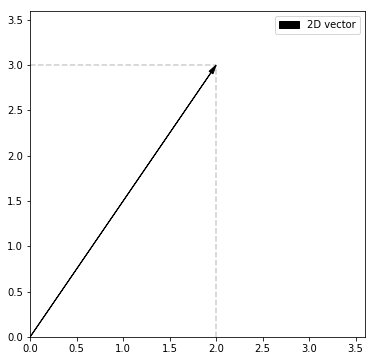

In [237]:
# Example of simple 2-dimensional vector
vector_2d = np.array([2, 3])

# Plot vector
plt.figure(figsize=(6, 6))
vector_arrow = plot_2D_vector(vector_2d)
plt.legend((vector_arrow,), ('2D vector',))
plt.show()

### Main vector operations
To fully define a vector space $V$ and be able to define bases, the following two operations are enough:
- Addition: $(\mathbf{v}, \mathbf{u}) \mapsto \mathbf{v} + \mathbf{u} \in V$
- Scalar multiplication: $(a, \mathbf{u}) \mapsto a\ \mathbf{v} \in V$

for $\mathbf{v}, \mathbf{u} \in \mathbf{V}$ and $a \in \mathbb{R}$

If we equip $V$ with an inner product operation, then we can also define angles between vectors and lenghts. As a result of that, we can define orthonormal bases.  
- $(\mathbf{v}, \mathbf{u}) \mapsto \mathbf{v} \cdot \mathbf{u} \in \mathbb{R}$

For more information and the axioms assigned to the above operations look [here for vector spaces](https://en.wikipedia.org/wiki/Vector_space#Definition) and [here for inner products](https://en.wikipedia.org/wiki/Inner_product_space#Definition).

#### Addition
- $(\mathbf{v}, \mathbf{u}) \mapsto \mathbf{v} + \mathbf{u}$
- Coordinate definition: $(x_1, x_2) + (x_1', x_2') = (x_1 + x_1', x_2 + x_2')$
- Returns the combined effect of two vectors

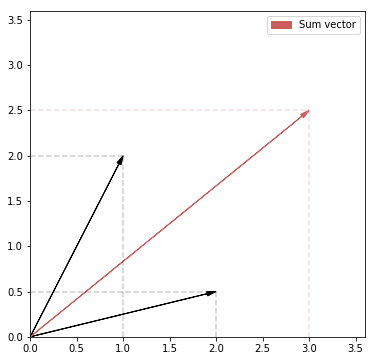

In [238]:
# Sum of two vectors
vector_1 = np.array([1, 2])
vector_2 = np.array([2, 0.5])

sum_vector = vector_1 + vector_2

# Plot vectors
plt.figure(figsize=(6, 6))
plot_2D_vector(vector_1)
plot_2D_vector(vector_2)
sum_v_arr = plot_2D_vector(sum_vector, color='indianred')
plt.legend((sum_v_arr,), ('Sum vector',))
plt.show()

#### Scalar multiplication
- $(a, \mathbf{u}) \mapsto a\ \mathbf{v}$
- Coordinate definition: $a \ (x_1, x_2) = (a\ x_1 + a\ x_2)$
- Multiplies the effect of a vector with a real number $a$

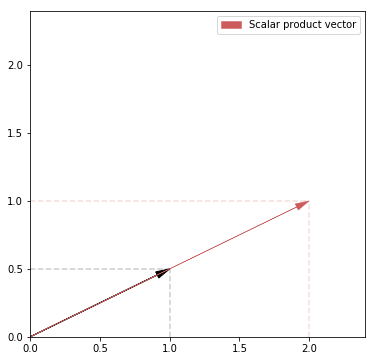

In [239]:
# Scalar multiplication of vector
vector = np.array([1, 0.5])
a = 2

scalar_product_vector = a * vector

# Plot vectors
plt.figure(figsize=(6, 6))
plot_2D_vector(vector)
sum_v_arr = plot_2D_vector(scalar_product_vector, color='indianred', lw=0.5)
plt.legend((sum_v_arr,), ('Scalar product vector',))
plt.show()

#### Dot product
- $(\mathbf{v}, \mathbf{u}) \mapsto \mathbf{v} \cdot \mathbf{u}$
- Coordinate definition: $(x_1, x_2) \cdot (x_1', x_2') = x_1 x_1' + x_2 x_2'$
- Multiplies the effects of the vectors relative to their angle.
- Two vectors $\mathbf{v}, \mathbf{u}$ are called orthogonal iff $\mathbf{v} \cdot \mathbf{u} = 0$.

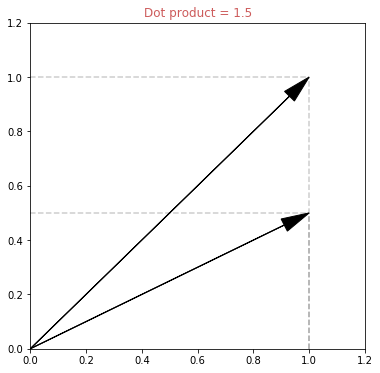

In [240]:
# Dot product of two vectors
vector_1 = np.array([1, 0.5])
vector_2 = np.array([1, 1])

dot_product = (vector_1 * vector_2).sum()
# or using numpy's built-in functions:
# dot_product_vector = np.dot(vector_1, vector_2)

# Plot vectors
plt.figure(figsize=(6, 6))
plt.title('Dot product = {}'.format(dot_product), color='indianred')
plot_2D_vector(vector_1)
vec_2 = plot_2D_vector(vector_2)
plt.show()

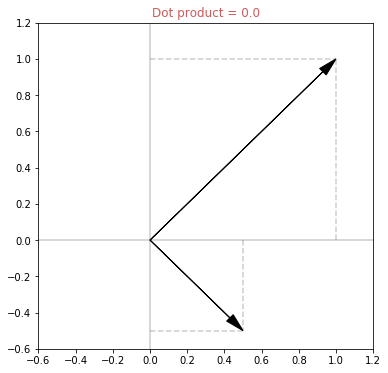

In [295]:
# Orthogonal vectors
vector_1 = np.array([0.5, -0.5])
vector_2 = np.array([1, 1])

dot_product = np.dot(vector_1, vector_2)

# Plot vectors
plt.figure(figsize=(6, 6))
plt.title('Dot product = {}'.format(dot_product), color='indianred')
plot_2D_vector(vector_1)
vec_2 = plot_2D_vector(vector_2)
plt.show()

### Orthonormal bases
Any basis such that all pairs of vectors are orthogonal and of length 1. The array representations of vectors used above assumed the existence of such a basis $\{e_1, e_2\}$ on the $x$ and $y$ axis. Thanks to operation of addition and scalar multiplication every vectory $v$ can be re-written as $a_1 e_1 + a_2 e_2$ or equivalently $(a_1, a_2)$.

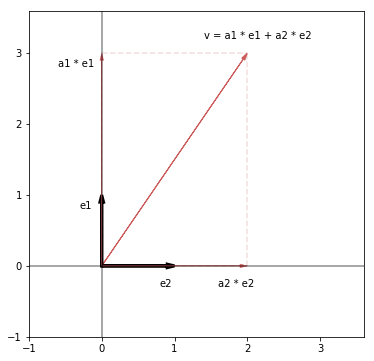

In [298]:
# The projections of the first vector we saw to e1 and e2
vector_2d = np.array([2, 3])
a1 = vector_2d[0]
a2 = vector_2d[1]

# the orthonormal basis
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Plot vector
plt.figure(figsize=(6, 6))
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plot_2D_vector(vector_2d, color='indianred')
e1_arr = plot_2D_vector(e1, lw=3)
e2_arr = plot_2D_vector(e2, lw=3)
plot_2D_vector(a1 * e1, color='indianred', lw=0.5)
plot_2D_vector(a2 * e2, color='indianred', lw=0.5)
plt.annotate('e1', xy=(-.3, .8))
plt.annotate('e2', xy=(.8, -.3))
plt.annotate('a1 * e1', xy=(-.6, 2.8))
plt.annotate('a2 * e2', xy=(1.6, -.3))
plt.annotate('v = a1 * e1 + a2 * e2', xy=(1.4, 3.2))
plt.show()

## Linear transformations and matrices

## Popular transformations

## Popular operations on transformations (in other words, transformations of transformations)

## Decompositions of transformations / matrices